## Final Project - Preprocessing and Models

Group members: Wenxuan Dai, Yijun Zhou, Rui Zhao, Shiwen Chen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Dai/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<font color = 'blue'>

### Step 1 - Data preprocessing

**1.1 Load in data:**

In [2]:
df = pd.read_csv('Ameshousing.csv', delimiter=',')
print "Input data size: ", np.shape(df)
df.head()

Input data size:  (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<font color = 'blue'>

As summerized above, there are totally 82 columns, in which 79 of them are predictors and the last column is the response - housing price. There is altogether 2930 observations.

<font color = 'blue'>

**1.2 Fill in missing data:** 

The following numerical columns have missing data - "Lot Frontage" and "Garage Yr Blt", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF2", "Bsmt Unf SF", "Total Bsmt SF", "Garage Cars", "Garage Area".

- For the "Garage Yr Blt", the data missing is because of that house doesn't have a garage. Therefore, we fill in the missing data with (the minmun built year - 15).

- For the rest of columns, there are only a few data missing because the data is accidentally not recorded, therefore we fill the missing data with the avarage of that column.

In [3]:
# Garage Yr Blt
no_ind = df[df['Garage Yr Blt'].isnull()].index
with_ind = df[df['Garage Yr Blt'].notnull()].index

min_Year = np.min(df.loc[with_ind, 'Garage Yr Blt'])
df.loc[no_ind, 'Garage Yr Blt'] = min_Year - 15

# Others
missing_list = ["Lot Frontage", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", 
        "Garage Cars", "Garage Area"]
for name in missing_list:
    no_ind = df[df[name].isnull()].index
    with_ind = df[df[name].notnull()].index

    mean_c = np.mean(df.loc[with_ind, name])
    df.loc[no_ind, name] = mean_c

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<font color = 'blue'>

**1.3 Deal with Outliers:**

We first plot out the boxplot of all numerical data, and then inspect each of them to find out which feature has distinct outliers. After observation, 7 columns were chosen to remove the outlier. In order to preserve more useful information while eliminate the noises, we only remove the outliers that are severely far from the normal values.

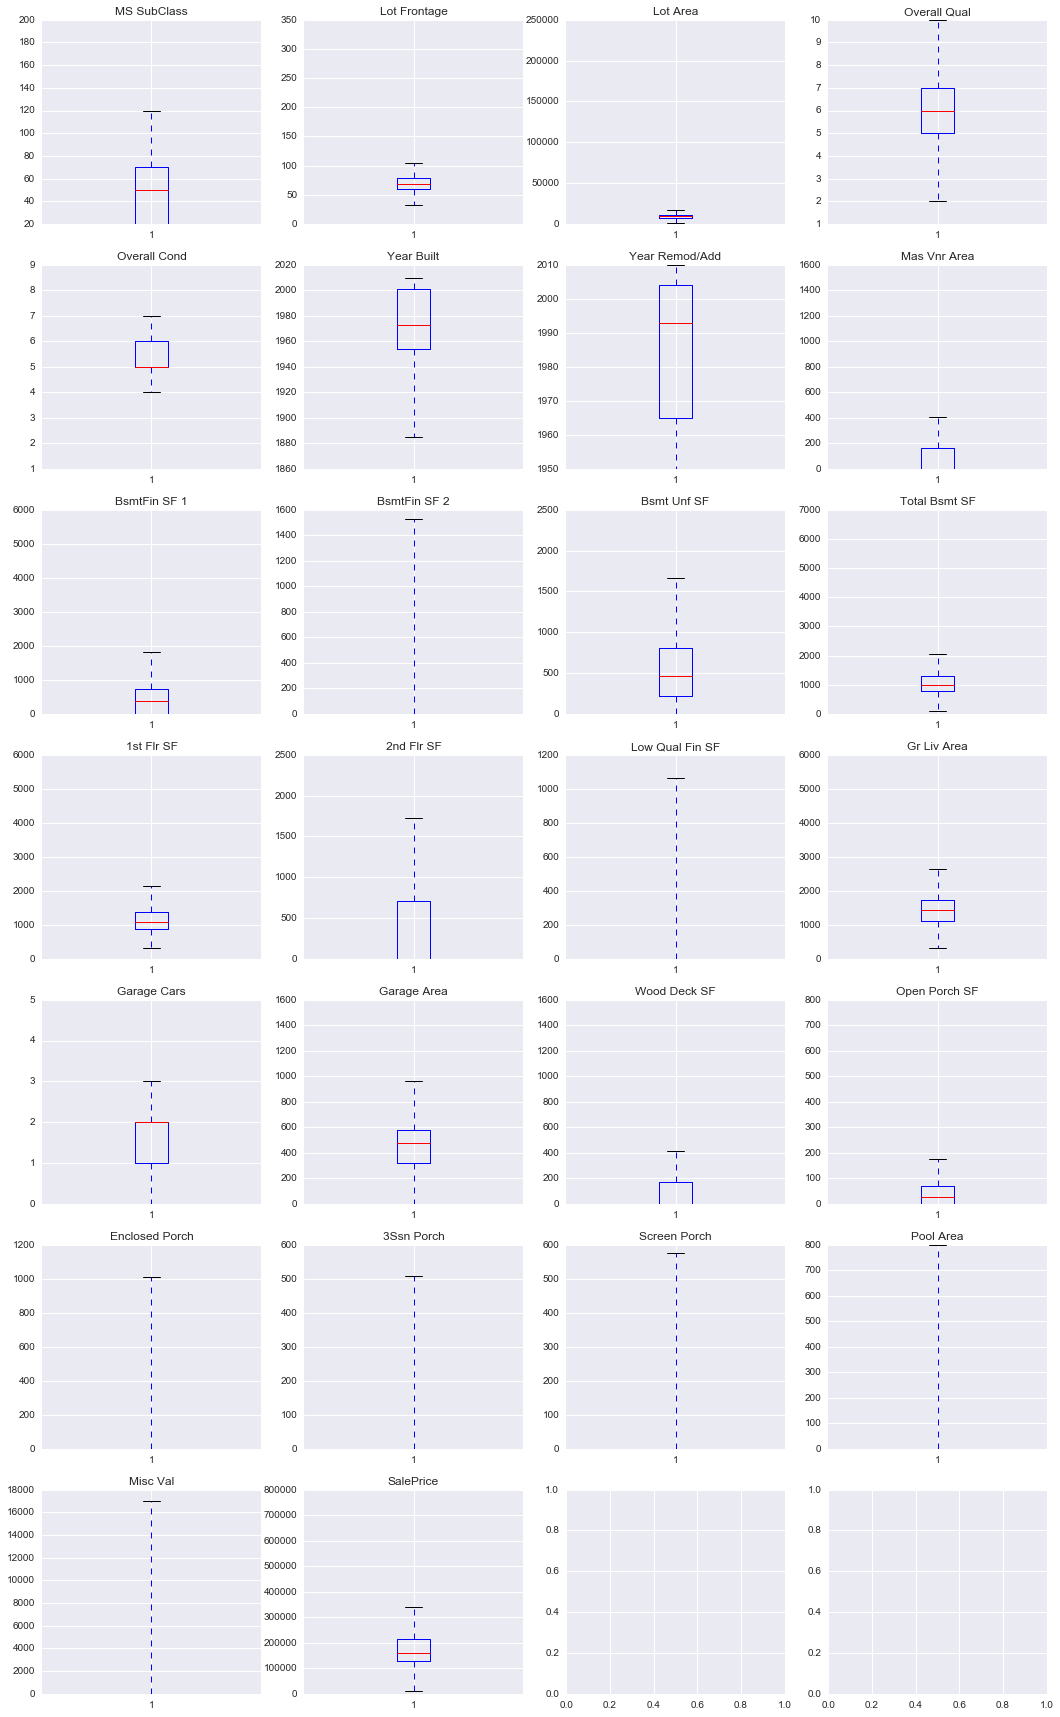

In [5]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(18, 30))
k = 0
names = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 
        'Low Qual Fin SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
        '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
for i in range(0,7):
    for j in range(0,4):
        if k < len(names):
            axes[i,j].boxplot(df[names[k]].tolist())
            axes[i,j].set_title(names[k])
            k += 1
plt.show()

In [6]:
df[df['Lot Frontage'] > 251]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1265,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [7]:
df = df[df['Lot Frontage'] <= 251]

In [8]:
df[df['Lot Area'] > 100000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
956,957,916176125,20,RL,150.00000,215245,Pave,NaN,IR3,Low,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
1570,1571,916125425,190,RL,69.22459,164660,Grvl,NaN,IR1,HLS,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
2071,2072,905301050,20,RL,69.22459,115149,Pave,NaN,IR2,Low,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
2115,2116,906426060,50,RL,69.22459,159000,Pave,NaN,IR2,Low,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000


In [9]:
df = df[df['Lot Area'] <= 100000]

In [10]:
df[df['BsmtFin SF 1'] > 3000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


In [11]:
df = df[df['BsmtFin SF 1'] <= 3000]

In [12]:
df[df['Gr Liv Area'] > 4000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
df = df[df['Gr Liv Area'] <= 4000]

In [14]:
df[df['Wood Deck SF'] > 1200]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2293,2294,923229100,80,RL,69.22459,15957,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,9,2007,WD,Normal,188000


In [15]:
df = df[df['Wood Deck SF'] <= 1200]

In [16]:
df[df['Open Porch SF'] > 700]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2195,2196,909176170,90,RL,60.0,10890,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,1512,1,2007,WD,AdjLand,150000


In [17]:
df = df[df['Open Porch SF'] <= 700]

In [18]:
df[df['SalePrice'] > 700000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [19]:
df = df[df['SalePrice'] <= 700000]

In [20]:
np.shape(df)

(2918, 82)

In [21]:
df['SalePrice'] = np.log(df['SalePrice'].values)

<font color = 'blue'>

### Step 2: Baseline model

For the baseline model, we will use the simple linear regression to estimate the housing price. We would select the four features which are most relevant to the housing price according to the result of data exploration (Milestone 3) as the predictors.

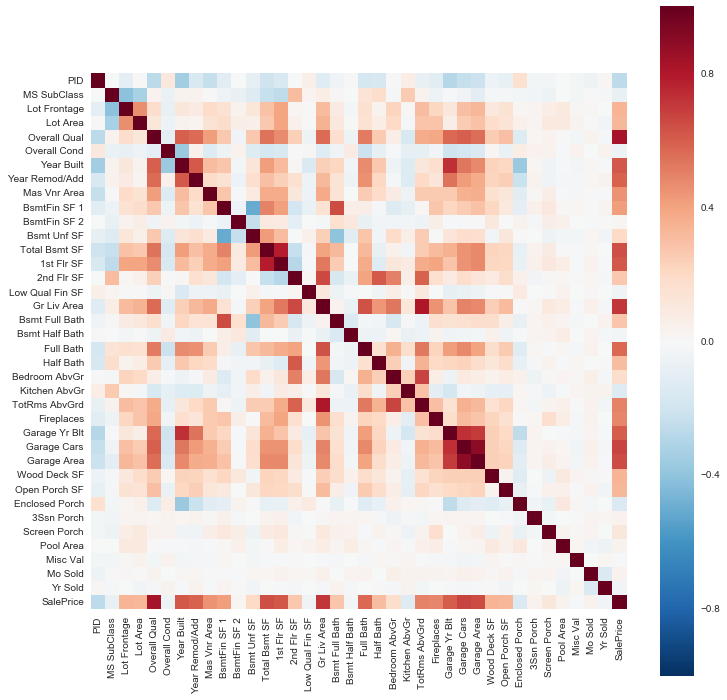

In [22]:
#Correlation matrix 
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [23]:
four_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area']
baseline_df = df[four_features]

In [24]:
corr['SalePrice']
new_corr = corr.drop(['PID','SalePrice'])['SalePrice']
pos_corr = new_corr[new_corr > 0]
pos_corr = pos_corr.sort_values(ascending= False)
neg_corr = new_corr[new_corr <= 0]
neg_corr = neg_corr.sort_values(ascending= True)
pos_corr_df = pd.DataFrame({'SalePrice': pos_corr})
neg_corr_df = pd.DataFrame({'SalePrice': neg_corr})
pos_corr_df['col_name'] = pos_corr.index
neg_corr_df['col_name'] = neg_corr.index

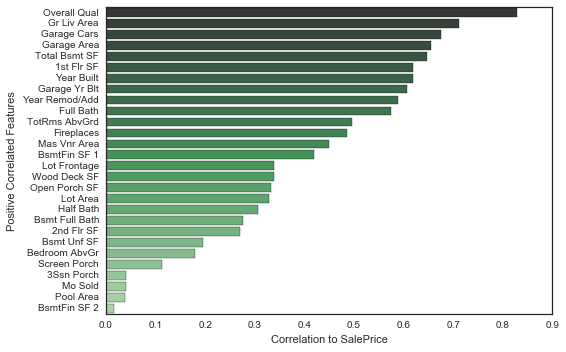

In [25]:
sns.set(style="white")
sns.barplot(x="SalePrice", y="col_name", data=pos_corr_df, palette = "Greens_d")
plt.xlabel("Correlation to SalePrice")
plt.ylabel("Positive Correlated Features")

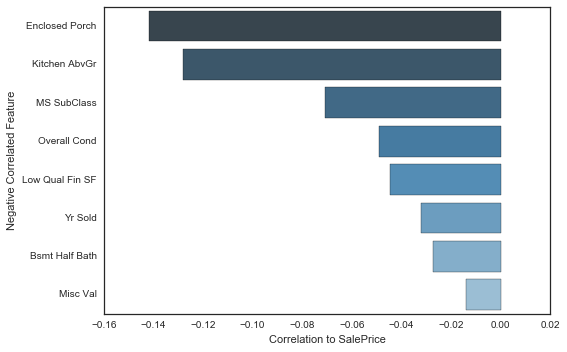

In [26]:
sns.set(style="white")
sns.barplot(x="SalePrice", y="col_name", data=neg_corr_df, palette = "Blues_d")
plt.xlabel("Correlation to SalePrice")
plt.ylabel("Negative Correlated Feature")

<font color = 'blue'>

According to the correlation matrix and correlation histogram above, we can select the four features: 'Overall Qual', 'Gr Liv Area', 'Garage Cars' and 'Garage Area'.  

In [27]:
#baseline model
x = baseline_df.values
y = df.values[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_scores = lr.score(x_test, y_test)
lr_scores

0.78579294349792728

<font color = 'blue'>

### Analysis:

The R square of this baseline model is 0.768, which is reasonable but can be further improved. Here are some aspects to be considered in order to improve the prediction accuracy:

1. Catagorical data is not used in the baseline model. Some of the catagorocal can be essetially useful such as the condition of house. We need to incorporate them into our model (e.g. using one-hot coding).

2. Although the 4 most relevant predictors are use in the baseline model, but that doesn't guarantee they carry the most significant part of information. Also, there may be colinearity between the selected predictors. More comprehensive feature-selection methods should be considered in the future work.

3. The response variable is right-skewed, which may violate the assumption of linear regression. Transformation could be performed to deal with this situation.

4. The relationship between some predictors and the response variable may not be exactly linear, we can also try some non-linear models. 

5. Sale time is an important confounding factor that may influence the price as well as the predictors. We may check the stationary and seasonality of the data, and apply time series analysis techniques.

We will improve our model to address the problems analysed above.

<font color = 'blue'>
### Step 3: Improved Linear Model

<font color = 'blue'>

### 3.1 Feature selection 

For the numerical predictors, we have performed the linear regression t-test for each individual predictor and deleted those whose p-value is larger than 0.05. The explanation for these numerical predictors can be seen below.

1. BsmtFin SF 2 (Type 2 finished square feet): p-value = 0.376491
    According to our observation, most of the values of BsmtFin SF 2 are 0, only a few of them are non-zero, which demonstrates that this predictor is not quite representative; meanwhile, we think that the type 2 square feet of the basement is for sure not very significant for the housing price.
2. Misc Val (Value of miscellaneous feature): p-value = 0.457918
    According to our observation, most of the values of Misc Val are 0, only a few of the are non-zero; we think that it is reasonable for not every house has the miscellaneous feature, which demonstrates that this predictor not very significant for the housing price.  


In [29]:
names = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 
        'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
        '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
val = []
for col_name in names:
    x = df[col_name]
    result = pd.ols(x=x,y=y)
    val.append([col_name, result.p_value[0]])
val.sort(key=lambda x: x[1])
b = [i[0] for i in val]
c = [i[1] for i in val]

/Users/Dai/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


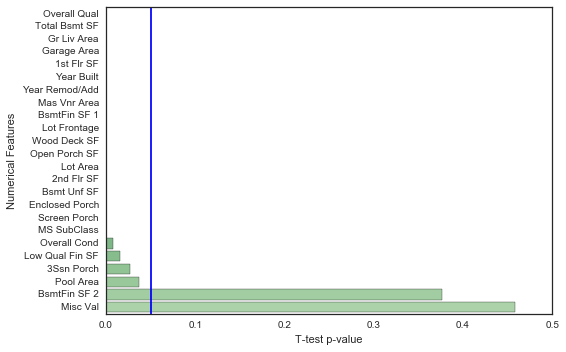

In [31]:
sns.set(style="white")
p_val_df = pd.DataFrame({"col_name": b, "p-value": c})
sns.barplot(x="p-value", y="col_name", data=p_val_df, palette = "Greens_d")
plt.xlabel("T-test p-value")
plt.ylabel("Numerical Features")
plt.axvline(x=0.05)

<font color = 'blue'>
For the categorical predictors, we have first performed the one-hot-coding transformation, and then do the overall linear regression F-test for each predictor. The predictors whose p-value are larger than 0.05 have been deleted. The explanation for these categorical predictors can be seen below.

1. Land Slope (Slope of property): p-value = 1.0
    The Land Slope has three categories: Gtl Gentle slope, Mod Moderate Slope and Sev         Severe Slope. Based on our analysis, the land slope may be relevant to the terrain of       the house’s neighborhood district, and different people may have different taste for it.      Thus it may not be a significant predictor for the housing price.
2. Utilities (Type of utilities available): p-value = 0.0948400338427
    The Utilities has four categories: AllPub All public Utilities (E,G,W,& S), NoSewr                 Electricity, Gas, and Water (Septic Tank), NoSeWa Electricity and Gas Only, and ELO         Electricity only. Based on our observation, nearly all the houses belong to the AllPub       group, which means that the other three types could almost be treated as                         "outliers". Thus this categorical predictor is not significant for the final result.
3. Kitchen AbvGr (Kitchens above grade): p-value = 1.0
    The Kitchen AbvGr has two categories: 1 and 2. Based on our observation, nearly all        the values are 1. Thus this categorical predictor is not significant for the final result.
4. Bsmt Half Bath (Basement half bathrooms): p-value = 0.453567482246
    The basement bathroom condition may be not very important for the evaluation of the     houses, which makes this deletion reasonable.

In [30]:
## This function encodes catagorical data using one-hot encoding method
# Input: 
#      x: dataframe to process 
# Return:
#      y: dataframe after one-hot encoding
def one_hot_coding(x, cater_col):
    # Create a new data frame to store one-hot encoding of attributes
    x_expanded = pd.DataFrame({}) 

    # Iterate over all attributes
    for column in x.columns:
        # Check if attribute is categorical: has less than 8 unique values,
        # or is string values (column has type 'object')
        if len(x[column].unique()) < 8 or x[column].dtype == np.dtype('object'):
            cater_col.append(column)
            # use one-hot encoding for this column
            encoding = pd.get_dummies(x[column], prefix = column)
            # append expanded attribute to data frame
            x_expanded = pd.concat([x_expanded, encoding], axis=1)
        else:
            x_expanded = pd.concat([x_expanded, x[[column]]], axis=1)
    
    return x_expanded, cater_col

df, catergorical_col = one_hot_coding(df,[])
print "data set size after one-hot encoding: ", df.shape
df.head()

data set size after one-hot encoding:  (2918, 333)


,Order,PID,MS SubClass,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,1,526301100,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.278393
1,2,526350040,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.561716
2,3,526351010,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.055250
3,4,526353030,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.404924
4,5,527105010,60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.154253


In [31]:
names = list(df.columns.values)

In [32]:
#linear model without deleting features
x = df.values[:,:-1]
y = df.values[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_scores = lr.score(x_test, y_test)
lr_scores

0.88189384554372674

In [33]:
cat_dic = {}
for cat_name in catergorical_col:
    for name in names:
         if cat_name in name:
                if cat_name not in cat_dic:
                    cat_dic[cat_name] = [name]
                else:
                    cat_dic[cat_name].append(name)

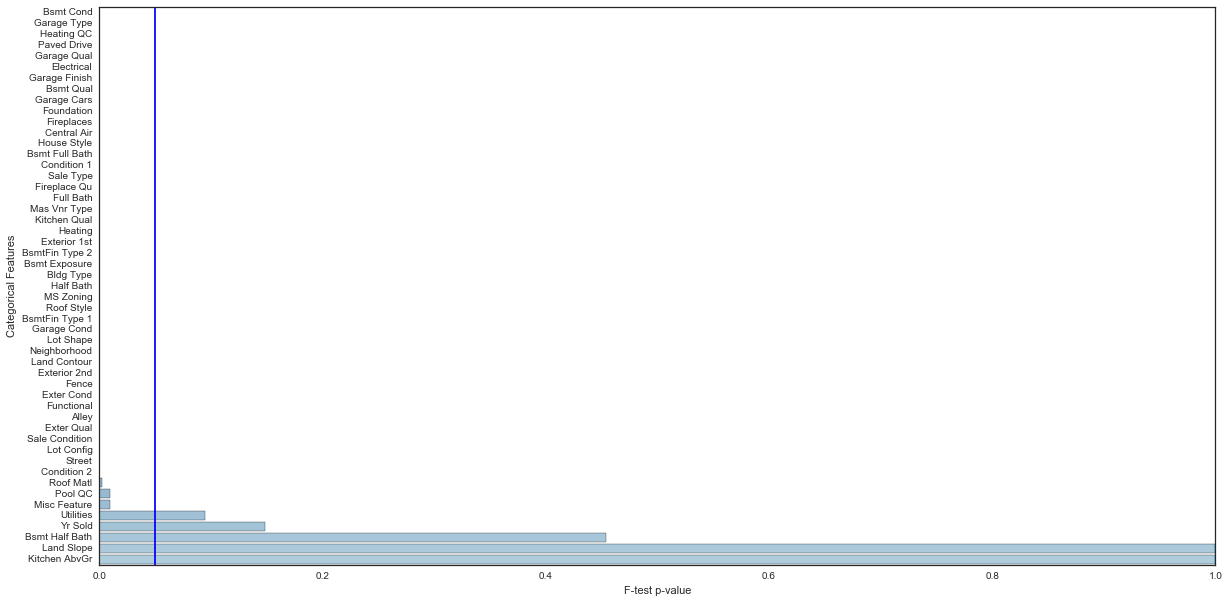

In [34]:
val = []
for i in cat_dic:
    x = df[cat_dic[i]]
    result = pd.ols(x=x,y=y)
    val.append([i, result.f_stat['p-value']])
val.sort(key=lambda x: x[1])
b = [i[0] for i in val]
c = [i[1] for i in val]
f_val_df = pd.DataFrame({"col_name": b, "p-value": c})
plt.figure(figsize=(20,10))
sns.barplot(x="p-value", y="col_name", data=f_val_df, palette = "Blues_d")
plt.xlabel("F-test p-value")
plt.ylabel("Categorical Features")
plt.axvline(x=0.05)

In [35]:
for col_name in names:
    x = df[col_name]
    result = pd.ols(x=x,y=y)
    if any(result.p_value) > 0.05:
        print col_name, result.p_value

Order x            0.101281
intercept    0.000000
dtype: float64
PID x            1.878898e-47
intercept    0.000000e+00
dtype: float64
MS SubClass x            0.000127
intercept    0.000000
dtype: float64
MS Zoning_A (agr) x            1.368591e-08
intercept    0.000000e+00
dtype: float64
MS Zoning_C (all) x            5.666945e-24
intercept    0.000000e+00
dtype: float64
MS Zoning_FV x            6.625696e-14
intercept    0.000000e+00
dtype: float64
MS Zoning_I (all) x            0.007492
intercept    0.000000
dtype: float64
MS Zoning_RH x            0.00261
intercept    0.00000
dtype: float64
MS Zoning_RL x            5.419317e-61
intercept    0.000000e+00
dtype: float64
MS Zoning_RM x            1.722056e-84
intercept    0.000000e+00
dtype: float64
Lot Frontage x            4.438594e-79
intercept    0.000000e+00
dtype: float64
Lot Area x            1.477788e-74
intercept    0.000000e+00
dtype: float64
Street_Grvl x            1.646491e-07
intercept    0.000000e+00
dtype: float64
S

In [36]:
#delete unrelated columns
df2 = df
drop_column = ['Order','PID','BsmtFin SF 2','Misc Val','Land Slope_Gtl', 'Land Slope_Mod', 
               'Land Slope_Sev','Utilities_AllPub', 'Utilities_NoSeWa', 'Utilities_NoSewr',
               'Kitchen AbvGr_0', 'Kitchen AbvGr_1', 'Kitchen AbvGr_2', 'Kitchen AbvGr_3',
               'Bsmt Half Bath_0.0', 'Bsmt Half Bath_1.0', 'Bsmt Half Bath_2.0',
               'Yr Sold_2006', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010', 'Mo Sold'
              ]

In [37]:
for col in drop_column:
    if col in df2.columns:
        del df2[col]

In [38]:
df2.head()

,MS SubClass,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Frontage,Lot Area,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,31770,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.278393
1,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,11622,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.561716
2,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,14267,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.055250
3,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,93.0,11160,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.404924
4,60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,74.0,13830,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.154253


<font color = 'blue'>
### 3.2 Linear model after feature selection

In [39]:
#linear model after deleting unrelated columns
x = df2.values[:,:-1]
y = df2.values[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_scores = lr.score(x_test, y_test)
lr_scores

0.88364342950681318

<font color = 'blue'>
For the simple linear model, we used all the features that we selected in the feature selection process. We got R-square of 0.8836. This is better than baseline model, but we wanted to use lasso and ridge to make sure the model did not overfit.

<font color = 'blue'>

After predictor selection, we may still face the problem of high dimension and collinearity. On account of it, we decided to try two methods in parallel:
1.	PCA – for dimension reduction (followed by linear regression)
2.	Ridge & Lasso – for regularization

### 3.3 Regularized linear regression - Ridge and Lasso



In [40]:
#cross validation to find the best regulization parameter
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.cross_validation import KFold
L_score = []
R_score = []
kf = KFold(n = len(x_train), n_folds=5)

regularization = 10.**np.arange(-10, 10)
for c in regularization:
    lasso_score = []
    ridge_score = []
    lasso_reg = Lasso_Reg(alpha = c)
    ridge_reg = Ridge_Reg(alpha = c)
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        lasso_reg.fit(train_x, train_y)
        ridge_reg.fit(train_x, train_y)
        lasso_score.append(lasso_reg.score(test_x,test_y))
        ridge_score.append(ridge_reg.score(test_x,test_y))
    L_score.append(np.average(lasso_score))
    R_score.append(np.average(ridge_score))

/Users/Dai/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [41]:
print L_score
print "The max score happens at",regularization[L_score.index(max(L_score))],"with score of", max(L_score)
print R_score
print "The max score happens at",regularization[R_score.index(max(R_score))],"with score of", max(R_score)

[0.90097268947345888, 0.90098793707496605, 0.90115022950176793, 0.90242507798676252, 0.90340644848741702, 0.90827563501258768, 0.92383913750649271, 0.92756673405110224, 0.90710145843487688, 0.8441979732583107, 0.8200187550251673, 0.72641857221329009, 0.2878905570315925, -0.0019584965423296019, -0.0019584965423296019, -0.0019584965423296019, -0.0019584965423296019, -0.0019584965423296019, -0.0019584965423296019, -0.0019584965423296019]
The max score happens at 0.001 with score of 0.927566734051
[0.90293704588874646, 0.90259881644295459, 0.90255449675636279, 0.90254936827641896, 0.90254946081355814, 0.9025504306797224, 0.90256011737259167, 0.90265564082884353, 0.90349770093451109, 0.90784386021543051, 0.91831729692521802, 0.92737131544767593, 0.92531371033953691, 0.89945442169789569, 0.85666093163779367, 0.84477244331262202, 0.81940531939096906, 0.7712990274455569, 0.70593691078351672, 0.40567588516179737]
The max score happens at 10.0 with score of 0.927371315448


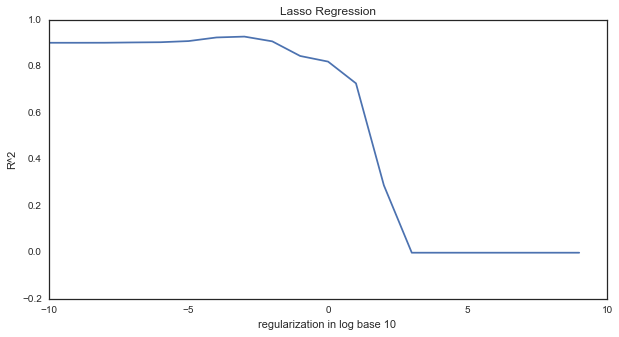

In [42]:
plt.figure(figsize=(10,5))
plt.plot(range(-10,10), L_score)
plt.xlabel("regularization in log base 10 ")
plt.ylabel("R^2")
plt.title("Lasso Regression")

<font color = 'blue'>

Lasso Model is a linear model trained with L1 norm as regularizer. 
For LASSO regression, we used cross validation (K-fold = 5) to tune the parameter of the model, lambda, where lambda is a constant that multiplies the L1 term to give L1 a weight so that we do not overweight or underweight the punishment. We tuned alpha parameter from 10^-10 to 10^10, on the training set with 5-fold cross validation on the training set. We figured out that at alpha 0.001, LASSO has the best R-square. Then we applied the model to the test set, and got the test R squared of 0.9073. Checking on the non-zero coefficient in the LASSO model, we realized that only 70 columns (after one-hot-coding on categorical features) contain non-zero coefficients.

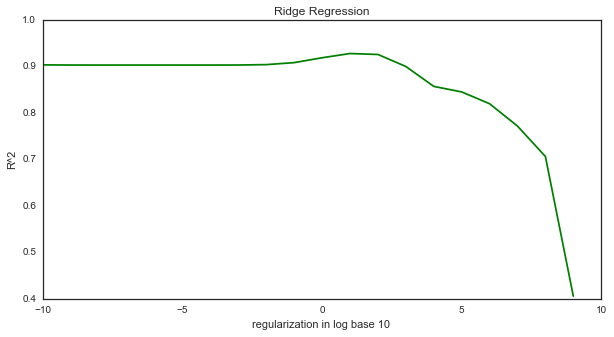

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(-10,10), R_score, color = "green")
plt.xlabel("regularization in log base 10 ")
plt.ylabel("R^2")
plt.title("Ridge Regression")

<font color = 'blue'>

Ridge Ridge solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. For Ridge Model, we used cross validation (K-fold = 5) to tune the parameter of the model, alpha, where alpha is a regularization strength that must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. We tuned alpha parameter from 10^-10 to 10^10, on the training set with 5-fold cross validation on the training set. We figured out that at alpha = 10, Ridge Model has the best R-squared score on the training set. Using the parameter alpha = 10 on the test set, we got the test R-squared to be 0.9092. Ridge Model did an approximately equal performance as Lasso Model but with a slightly better performance result.

In [44]:
#lasso regression
lasso_reg = Lasso_Reg(alpha = 0.001)
lasso_reg.fit(x_train, y_train)
coef_df = pd.DataFrame({"col_name": df.columns[:-1], "coef": lasso_reg.coef_.tolist()})
print lasso_reg.score(x_test,y_test)
coef_df = coef_df[coef_df.coef != 0.0]

0.907299673871


In [45]:
coef_df

,coef,col_name
0,-0.000278,MS SubClass
3,0.012495,MS Zoning_FV
6,0.045576,MS Zoning_RL
8,0.000056,Lot Frontage
9,0.000006,Lot Area
18,-0.007264,Land Contour_Bnk
30,0.015863,Neighborhood_BrkSide
33,0.079086,Neighborhood_Crawfor
40,-0.015816,Neighborhood_MeadowV
44,-0.008933,Neighborhood_NWAmes


In [46]:
#ridge regression
ridge_reg = Ridge_Reg(alpha = 10)
ridge_reg.fit(x_train, y_train)
print ridge_reg.score(x_test,y_test)

0.909240586953


<font color = 'blue'>

### 3.4 PCA

In [58]:
#using PCA
from sklearn.decomposition import PCA
#Apply PCA to data and get the top 3 axes of maximum variation
x = df.values[:,:-1]
lr_scores = []
for i in range(1,200):
    pca = PCA(n_components=i)
    pca.fit(x)

    #Project to the data onto the three axes
    x_reduced = pca.transform(x)

    y = df.values[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.6, random_state=42)

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    lr_scores.append(lr.score(x_test, y_test))

In [59]:
print "The max score happens at", lr_scores.index(max(lr_scores)), "with score of", max(lr_scores)

The max score happens at 125 with score of 0.907664485517


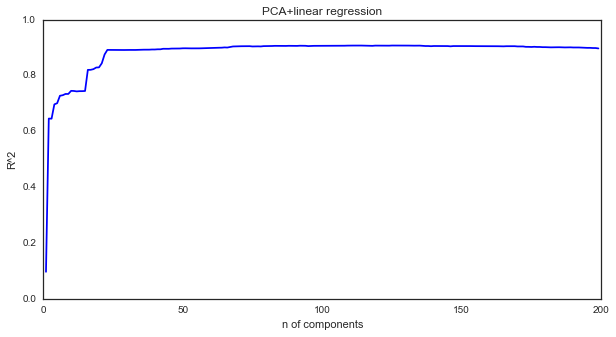

In [60]:
plt.figure(figsize=(10,5))
plt.plot(range(1,200), lr_scores, color = "blue")
plt.xlabel("n of components")
plt.ylabel("R^2")
plt.title("PCA+linear regression")

<font color = 'blue'>

### Step 4: Nonlinear Models

We also tried non-linear models: KNN, decision tree and gradiant boosting. 

### 4.1 KNN Regression

In [61]:
#KNN Regression:
from sklearn.neighbors import KNeighborsRegressor
x = df2.values[:,:-1]
y = df2.values[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_scores = knn.score(x_test, y_test)
knn_scores

from sklearn.cross_validation import KFold
KNN_score = []
kf = KFold(n = len(x_train), n_folds=5)

for c in range(1,100):
    knn_score = []
    knn = KNeighborsRegressor(n_neighbors=c)
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        knn.fit(train_x, train_y)
        knn_score.append(knn.score(test_x,test_y))
    KNN_score.append(np.average(knn_score))

In [62]:
print "The max score happens at", KNN_score.index(max(KNN_score)), "with score of", max(KNN_score)

The max score happens at 5 with score of 0.69025997093


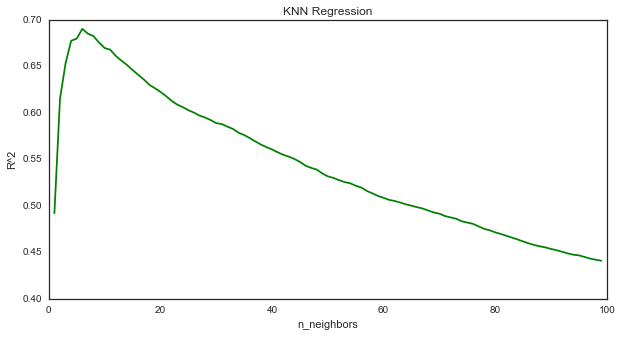

In [63]:
plt.figure(figsize=(10,5))
plt.plot(range(1,100), KNN_score, color = "green")
plt.xlabel("n_neighbors")
plt.ylabel("R^2")
plt.title("KNN Regression")

In [64]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.67574947297549093

K nearest neighbors is a simple algorithm that stores all available cases and predicts the numerical target based on a similarity measure. In KNN, the selection of K can greatly influence the performance of the model. larger values of k reduce the effect of noise on the classification, but make boundaries between classes less distinct. So we tune the number of nearest neighbors to find the best KNN model. In this case, we set the k from 1 to 100, and use k-fold to calculate the R^2 of the model. As seen in the model below, the R^2 first increases and then decrease as k increases. The highest R^2 appears at the point when k = 6, and this gives the best R^2 of 0.6757.

<font color = 'blue'>

### 4.2 Decision Tree

In [65]:
from sklearn import tree
DT_score = []
kf = KFold(n = len(x_train), n_folds=5)
for c in range(1,100):
    dt_score = []
    clf = tree.DecisionTreeRegressor(max_depth=c)
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        clf.fit(train_x, train_y)
        dt_score.append(clf.score(test_x, test_y))
    DT_score.append(np.average(dt_score))

In [66]:
print "The max score happens at", DT_score.index(max(DT_score)), "with score of", max(DT_score)

The max score happens at 5 with score of 0.771748743976


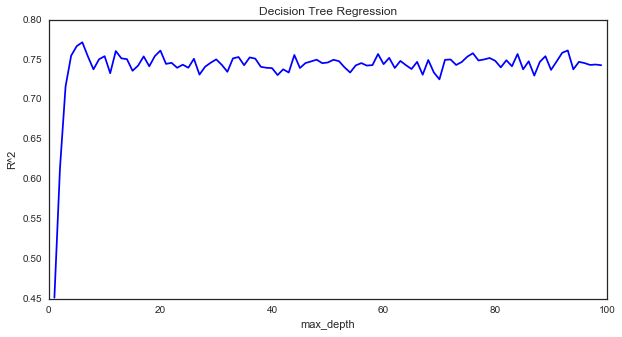

In [67]:
plt.figure(figsize=(10,5))
plt.plot(range(1,100), DT_score, color = "blue")
plt.xlabel("max_depth")
plt.ylabel("R^2")
plt.title("Decision Tree Regression")

In [68]:
clf = tree.DecisionTreeRegressor(max_depth=5)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.73950692378778471

Decision Tree
The decision tree uses a tree-like model of decisions and possible consequences, which is usually used for classification. Here we have used the decision tree as a regression model for housing price prediction. We have tuned the max_depth parameter from 1 to 100 to guarantee both the effectiveness and efficiency. As seen in the figure below, the R^2 first increases to the peak and then has a fluctuation pattern as the max_depth increases. This is understandable for higher max_depth may lead to overfitting and ends with bad regression result. The highest R^2 appears at the point when max_depth equals 6, which gives the best R^2 of 0.7401.

<font color = 'blue'>

### 4.3 Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
GB_score = []
kf = KFold(n = len(x_train), n_folds=5)
for c in range(1,10):
    gb_score = []
    est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
     max_depth= c, random_state=0, loss='ls')
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        est.fit(train_x, train_y)
        gb_score.append(est.score(test_x, test_y))
    GB_score.append(np.average(gb_score))
print "The max score happens at", GB_score.index(max(GB_score)), "with score of", max(GB_score)

The max score happens at 2 with score of 0.919364976819


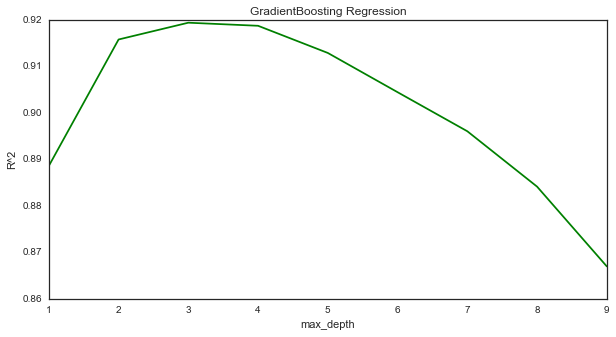

In [71]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10), GB_score, color = "green")
plt.xlabel("max_depth")
plt.ylabel("R^2")
plt.title("GradientBoosting Regression")

In [72]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
     max_depth= 2, random_state=0, loss='ls')
est.fit(x_train, y_train)
est.score(x_test, y_test)

0.8862365503067352

Gradient boosting, as a machine learning technique, could be used for both classification and regression problem. It produces a prediction model in the form of an ensemble of comparatively weak prediction models, typically decision trees. GB builds the model in a forward stage-wise fashion, and allows for the optimization of arbitrary differentiable loss functions. Here we have used the least squares regression as the loss function. In each stage a regression tree is fit on the negative gradient of the given loss function. The learning rate (which shrinks the contribution of each tree) and n_estimators (the number of boosting stages to perform; GB is fairly robust to over-fitting so a large number usually results in better performance) are set to be the default values (0.1 and 100). We have tuned the max_depth (maximum depth of the individual regression estimators) from 1 to 9 to guarantee the effectiveness and efficiency. As seen in the figure below, the R^2 first increases to the peak and then decreases as the max_depth increases. The highest R^2 appears at the point when max_depth equals 3, which gives the best R^2 of 0. 8892.

In [73]:
#ridge regression
ridge_reg = Ridge_Reg(alpha = 10)
ridge_reg.fit(x_train, y_train)
print ridge_reg.score(x_test,y_test)
y_pred = ridge_reg.predict(x)

0.909240586953


In [74]:
import matplotlib.pyplot as plt
import numpy as np
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)   # Standard deviation of the difference
    

    plt.scatter(mean, diff, color = "darkred", *args, **kwargs)
    plt.axhline(md,           color='black', linestyle='--')
    plt.axhline(md + 1.96*sd, color='black', linestyle='--')
    plt.axhline(md - 1.96*sd, color='black', linestyle='--')
    plt.xlim(10.5,14)
    plt.ylim(-1.5,1.5)

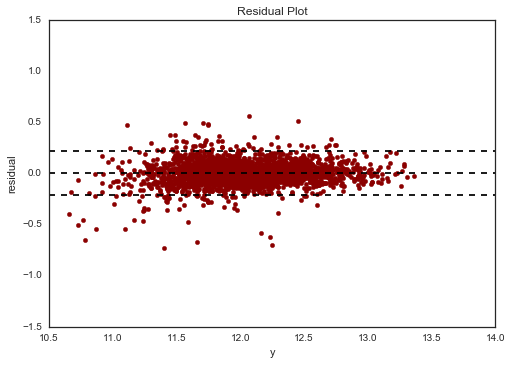

In [75]:
bland_altman_plot(y, y_pred)
plt.title('Residual Plot')
plt.ylabel("residual")
plt.xlabel("y")
plt.show()